Hometask 4: Аналитика перелётов

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

airports = pd.read_csv('airports.csv')
df = pd.read_csv('flights.csv',  dtype=str)
airlines = pd.read_csv('airlines.csv')
df = df.loc[~df[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1)]
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
df = df.drop(columns=['YEAR', 'MONTH', 'DAY'])
cols = df.columns.to_list()
df = df[cols[-1:] + cols[:-1]]
df.head()

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-01-01,4,AS,98,N407AS,ANC,SEA,0005,2354,-11,...,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,4,AA,2336,N3KUAA,LAX,PBI,0010,0002,-8,...,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,4,US,840,N171US,SFO,CLT,0020,0018,-2,...,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01,4,AA,258,N3HYAA,LAX,MIA,0020,0015,-5,...,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,4,AS,135,N527AS,SEA,ANC,0025,0024,-1,...,0259,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Выясним среднее время задержки рейса

In [5]:
df = df.loc[(df.ORIGIN_AIRPORT.apply(len) == 3) & (df.DESTINATION_AIRPORT.apply(len) == 3)]
percentage_without_delay = df[["AIR_SYSTEM_DELAY", "SECURITY_DELAY", "AIRLINE_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]].isnull().sum()/df.shape[0]*100

print("Percentage of flights dispatched on time = ", percentage_without_delay[2] )

Percentage of flights dispatched on time =  66.69745852641866


Количество рейсов у разных авиакомпаний

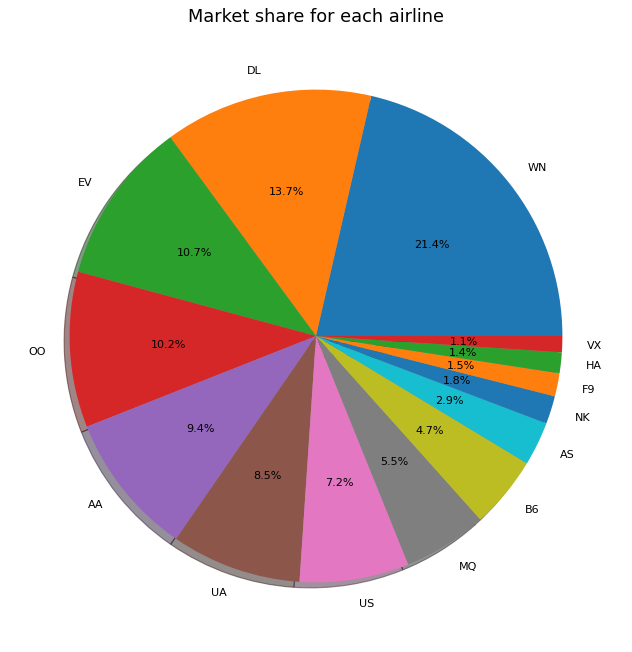

In [6]:
Number_of_flights = sum(df.groupby('AIRLINE').size())
fig = plt.figure(figsize = (16,10), dpi=80)
fig.patch.set_facecolor('xkcd:white')


plt.title('Market share for each airline', fontsize=16)
plt.pie(100*df.groupby('AIRLINE').size().sort_values()[::-1]/Number_of_flights, labels=df.groupby('AIRLINE').size().sort_values()[::-1].index, autopct='%1.1f%%',  shadow=True)
plt.show()

При этом каждая компания создаёт количество задержек в процентном соотношени:

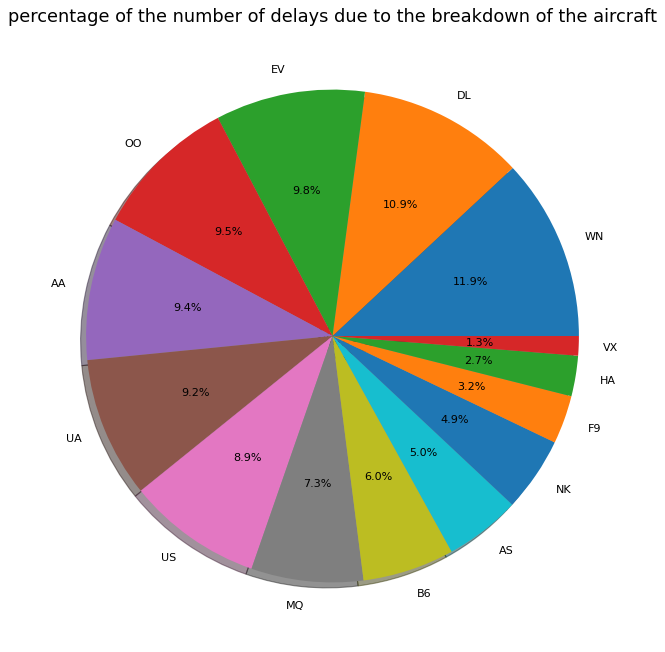

In [7]:
Number_of_flights_delays = sum(df.groupby('AIRLINE')['AIRLINE_DELAY'].size())

fig = plt.figure(figsize = (16,10), dpi=80)
fig.patch.set_facecolor('xkcd:white')

plt.title('percentage of the number of delays due to the breakdown of the aircraft', fontsize=16)
plt.pie(100*df.groupby('AIRLINE')['AIRLINE_DELAY'].nunique().sort_values()[::-1]/Number_of_flights_delays, labels=df.groupby('AIRLINE')['AIRLINE_DELAY'].size().sort_values()[::-1].index, autopct='%1.1f%%',  shadow=True)
plt.show()

Рассмотрим какие рейсы самые загруженные и на каких рейсах происходит самое частое число задержек.

Самые загруженные рейсы



In [15]:
df['ROUTE'] = df['ORIGIN_AIRPORT']  + "->" +  df['DESTINATION_AIRPORT']
df.groupby('ROUTE').size().sort_values()[:-11:-1]

ROUTE
SFO->LAX    2432
JFK->LAX    2412
LAX->JFK    2410
LAX->SFO    2384
LAS->LAX    2102
LAX->LAS    2033
HNL->OGG    1801
OGG->HNL    1795
LGA->ORD    1733
ORD->LGA    1716
dtype: int64

In [16]:
df.groupby('ROUTE')['AIRLINE_DELAY'].nunique().sort_values()[:-11:-1]

ROUTE
JFK->LAX    104
ORD->DFW     98
LGA->ATL     89
DFW->LAX     85
ORD->MSP     84
LAX->SFO     82
ORD->DEN     82
DFW->ATL     82
ORD->SFO     81
ORD->CLE     80
Name: AIRLINE_DELAY, dtype: int64

Рассмотрим статистику по задержкам из аэропортов. Данные по задержкам из-за проблем с безопасностью свидетельствуют об отсутствии должных систем безопасности.

В первой диаграмме представленны первые 10 самых загруженных аэропортов во второй диаграмме предствелены 10 аэропортов с самыми частыми задержками. Следующие аэропорты: DFW PHX LAX ORD IAH встречаются в обоих списках.

Text(0, 0.5, 'Flights per year')

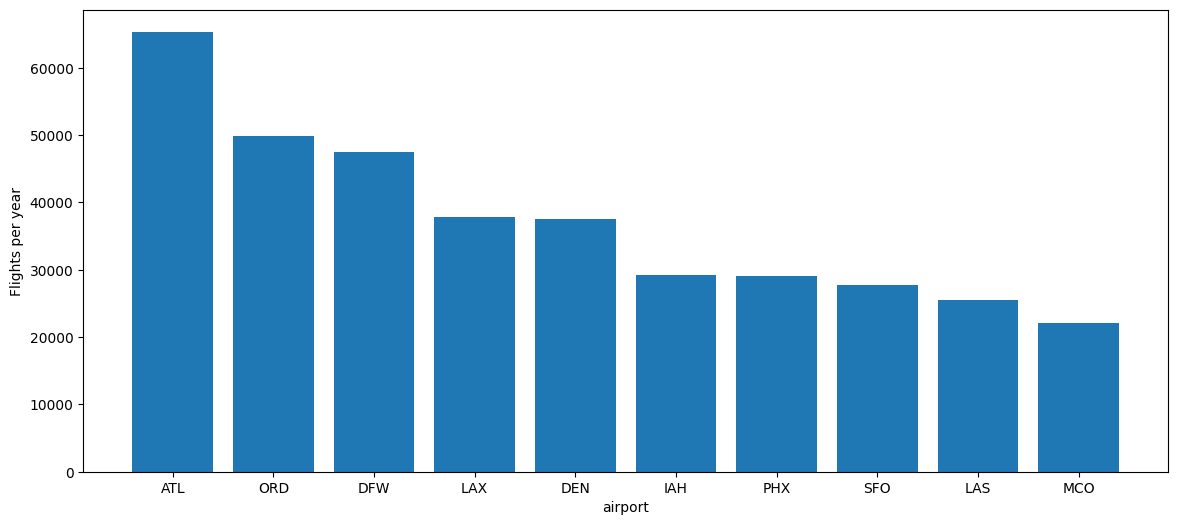

In [17]:
_AIRPORT = df.groupby('ORIGIN_AIRPORT').size().sort_values()[:-11:-1]

_, ax = plt.subplots(figsize=(14,6))

ax.bar(_AIRPORT.index, _AIRPORT)
ax.set_xlabel("airport")
ax.set_ylabel("Flights per year")

Text(0, 0.5, 'number of delays')

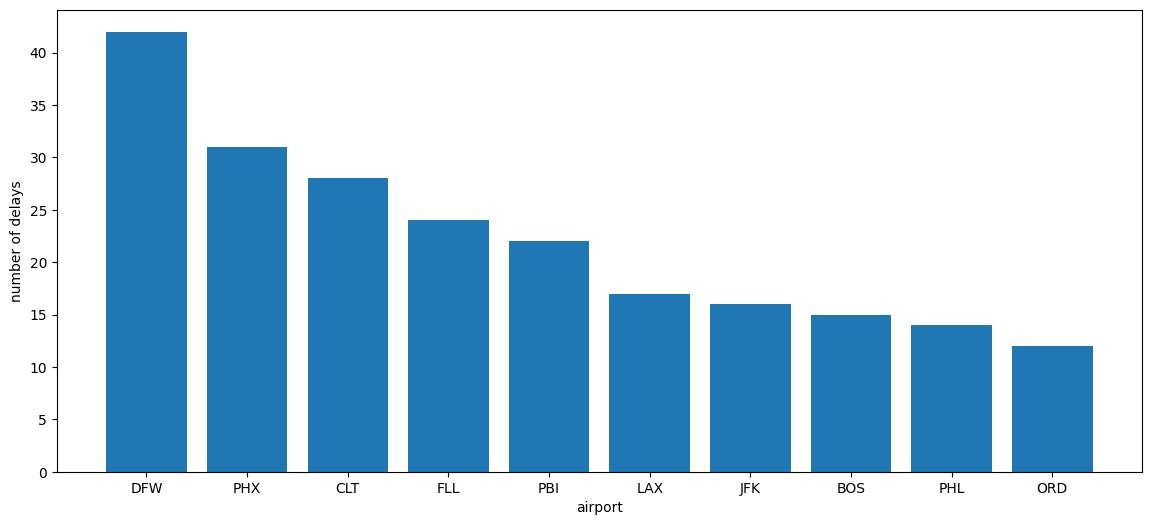

In [18]:
_AIRPORT_DELAY = df.groupby('ORIGIN_AIRPORT')['SECURITY_DELAY'].nunique().sort_values()[:-11:-1]

_, ax = plt.subplots(figsize=(14,6))

ax.bar(_AIRPORT_DELAY.index, _AIRPORT_DELAY)
ax.set_xlabel("airport")
ax.set_ylabel("number of delays")